## Exploratory Data Analysis on the Automobile dataset

This dataset contains data pertaining to automobiles. Let's see what we can find by exploring this dataset. We will cleanse the data and work through a series of visualizations to find out more.


In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the dataset from the text file
df = pd.read_csv('automobile.txt', sep=',')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Data Cleansing

We will go through a series of steps to cleanse and prepare the data, making it easier to work with during our exploration.

#### Remove unnecessary or redundant columns

We will remove columns that are not useful for our exploration, making the dataset faster to work with.

In [3]:
# Remove unnecessary or redundant columns
df = df.drop(columns=['fuel-system',
                      'bore',
                      'stroke',
                      'compression-ratio',
                      'engine-type',
                      'num-of-cylinders',
                      'engine-size',
                      'peak-rpm',
                      'fuel-type',
                      'aspiration'
                       ])

#### Remove any duplicate rows

In order for our visualizations to be accurate, we will try and minimise any inconsistencies and duplicates. 

In [4]:
# Remove any duplicate rows
df = df.drop_duplicates(keep='first')

#### Remove missing data entries

Some columns have some missing entries, let's remove those rows.

In [5]:
# Remove missing entries for 'normalized-losses' column
df = df[df['normalized-losses'] != '?']
df = df[df['horsepower'] != '?']

#### Checking the data types

Let's make sure our data types are what we need them to be.

In [6]:
# Print the data types
df.dtypes

symboling              int64
normalized-losses     object
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Some column formats are objects, but having them as integers would be more useful. Let's change that.

In [7]:
# Change column format to int64
df['normalized-losses'] = df['normalized-losses'].astype('int64')
df['horsepower'] = df['horsepower'].astype('int64')
df['price'] = df['price'].astype('int64')

#### Our dataset after cleansing

In [8]:
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,horsepower,city-mpg,highway-mpg,price
3,2,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,102,24,30,13950
4,2,164,audi,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,115,18,22,17450
6,1,158,audi,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,110,19,25,17710
8,1,158,audi,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,140,17,20,23875
10,2,192,bmw,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,101,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,114,23,28,16845
201,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,160,19,25,19045
202,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,134,18,23,21485
203,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,106,26,27,22470


### Let's begin exploring

It is interesting to have data on symboling and normalized losses, this has to do with a car's safety, but we'll get to that later. First, let's take a look at the fun stats.

#### Power

Let's take a look at the top ten cars with the most horsepower

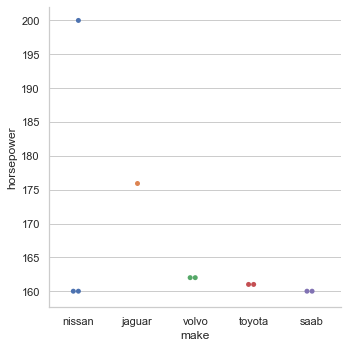

In [27]:
# Cars with the highest horsepower
df_horsepower = df.sort_values('horsepower',ascending=False)

sns.catplot(x="make", y="horsepower", kind="swarm", data=df_horsepower.head(10));

While there are other cars in the original dataset that had horsepower higher than 200, unfortunately they were removed due to missing values. Interestingly, Volvo having two entries in the top ten, especially when they are considered to be one of the car manufacturers that produce the safest cars, we will look into that further later on.

#### Pricing

Let's take a look at the most expensive and cheapest cars in the dataset.

Text(0.5, 1.0, 'Most Expensive Cars')

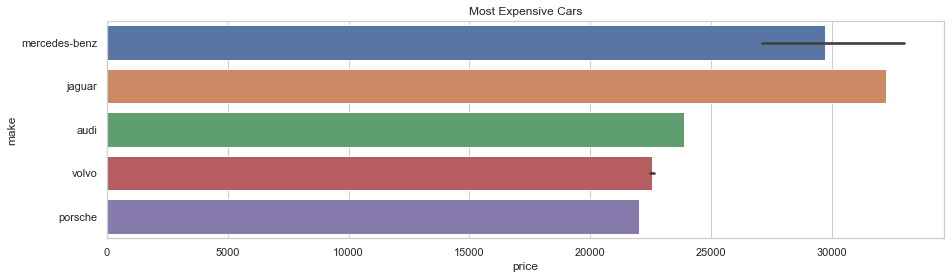

In [33]:
# The most expensive cars
df_price = df.sort_values('price',ascending=False)

fig = plt.figure(figsize=(15,4))
sns.set(style="whitegrid")
sns.barplot(y='make',x='price',data=df_price.head(10)).set_title('Most Expensive Cars')

Text(0.5, 1.0, 'Cheapest Cars')

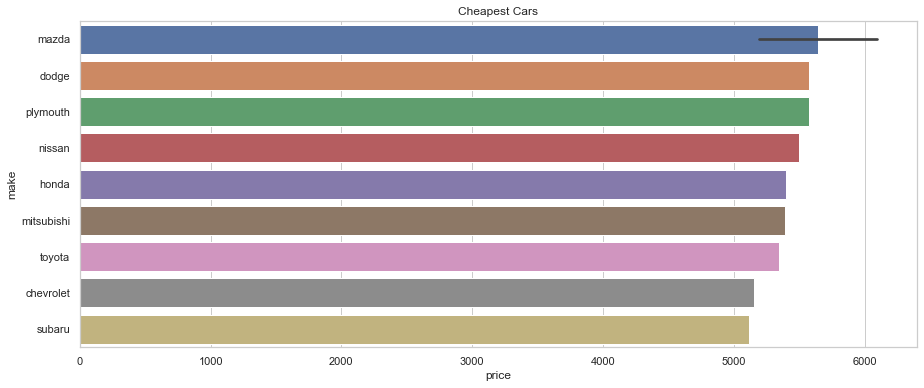

In [36]:
# The cheapest cars
fig = plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
sns.barplot(y='make',x='price',data=df_price.tail(10)).set_title('Cheapest Cars')

Write something about price.

#### Safety

Symboling represents a car's risk factor on a scale or -3 to 3, where -3 is very safe, and 3 is very risky. Let's use this rating to see which cars a the safest, and which are not safe at all.

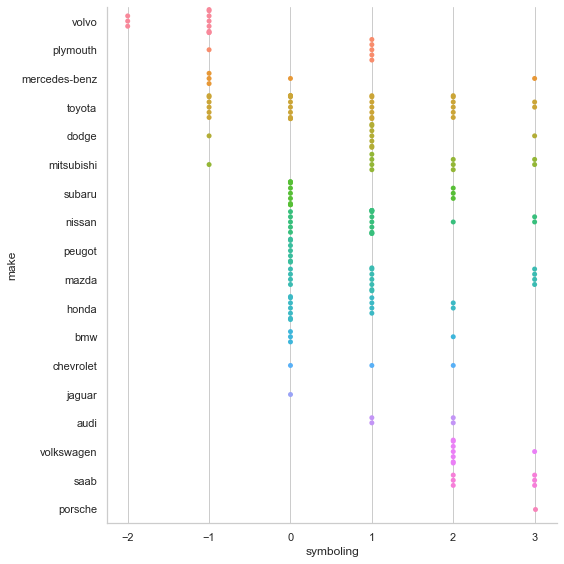

In [46]:
# The safest cars
df_symboling = df.sort_values('symboling')

sns.catplot(x="symboling",y="make",kind="swarm",data=df_symboling,height=8,aspect=1)

According to this visualization, Volvo produces the safest cars, also being the only manufacturer that achieved a symboling factor less than -1, and then Porsche making the riskiest cars. 

From what we have seen so far, Volvo has been in the top listings for horsepower and safety, but also one of the most expensive. If safety is your top concern when purchasing a vehicle, then Volvo is probably your best choice.